In [ ]:
#https://blog.csdn.net/zouxiaolv/article/details/100590725?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task

# PCA 深度研究

In [283]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## one toy example

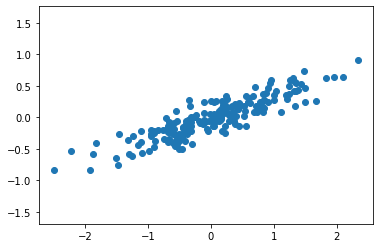

In [285]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## goal:
finding the relationship between $x$ and $y$

In [300]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [287]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

In [288]:
print(pca.components_)#特征向量，返回具有最大方差的成分

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [305]:
#U,D,V = np.linalg.svd(X-X.mean(0))

In [306]:
#U,D,V

In [303]:
pca.singular_values_

array([12.31843207,  1.91757691])

In [304]:
pca.singular_values_**2/199

array([0.7625315, 0.0184779])

In [293]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [299]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


## data visualization

In [177]:
def draw_vector(v0, v1, ax=None): 
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


In [308]:
list(zip(pca.explained_variance_, pca.components_))

[(0.7625315008826115, array([-0.94446029, -0.32862557])),
 (0.018477895513562572, array([-0.32862557,  0.94446029]))]

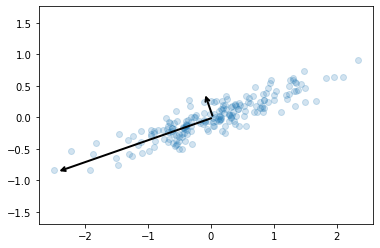

In [179]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

# PCA as dimensionality reduction

- 去掉特征根特别小的一些成分
- 降低维度
- 注意和特征选择的区别

In [309]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) 
print("original shape: ", X.shape) 
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


In [311]:
pca.components_[0]

array([-0.94446029, -0.32862557])

In [310]:
X_pca[:10]

array([[ 0.67676923],
       [-1.07121393],
       [ 0.72791236],
       [ 2.30964136],
       [ 0.63005232],
       [ 1.02448887],
       [ 0.77718351],
       [-1.39656414],
       [-0.29104987],
       [ 1.88864221]])

In [313]:
#(X-X.mean(0)).dot(pca.components_[0])[:10]

## 利用inverse_transform 将低纬数据 扩展到原始数据上，画图做对比

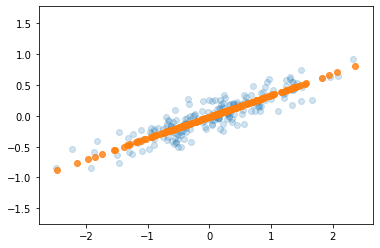

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## PCA for visualization: Handwritten digits

In [314]:
from sklearn.datasets import load_digits 
digits = load_digits()
digits.data.shape

(1797, 64)

In [315]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [316]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [317]:
digits.target_names[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

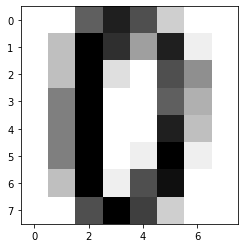

In [321]:
plt.imshow(digits.data[30].reshape(8, 8),
                              cmap='binary', interpolation='nearest'
        );

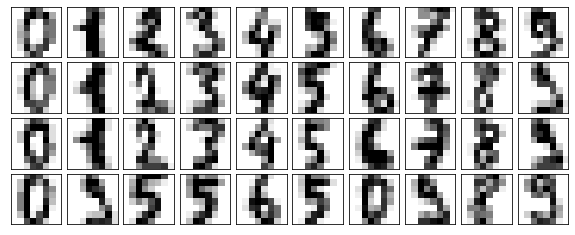

In [322]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
                    ax.imshow(data[i].reshape(8, 8),
                              cmap='binary', interpolation='nearest',
                             )
plot_digits(digits.data)

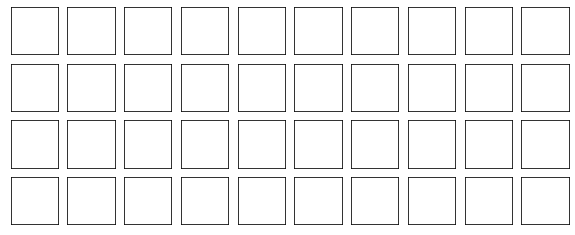

In [324]:
fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.2, wspace=0.2)) 

In [204]:
list(enumerate(axes.flat))

[(0, <matplotlib.axes._subplots.AxesSubplot at 0x1a23614208>),
 (1, <matplotlib.axes._subplots.AxesSubplot at 0x1a235dff60>),
 (2, <matplotlib.axes._subplots.AxesSubplot at 0x1a2c01ed30>),
 (3, <matplotlib.axes._subplots.AxesSubplot at 0x1a2ca249b0>),
 (4, <matplotlib.axes._subplots.AxesSubplot at 0x1a2b98b588>),
 (5, <matplotlib.axes._subplots.AxesSubplot at 0x1a2c029320>),
 (6, <matplotlib.axes._subplots.AxesSubplot at 0x1a24c3ba58>),
 (7, <matplotlib.axes._subplots.AxesSubplot at 0x1a24b17898>),
 (8, <matplotlib.axes._subplots.AxesSubplot at 0x1a23c902b0>),
 (9, <matplotlib.axes._subplots.AxesSubplot at 0x1a24cc1390>),
 (10, <matplotlib.axes._subplots.AxesSubplot at 0x1a23392da0>),
 (11, <matplotlib.axes._subplots.AxesSubplot at 0x1a24ae9128>),
 (12, <matplotlib.axes._subplots.AxesSubplot at 0x120704e80>),
 (13, <matplotlib.axes._subplots.AxesSubplot at 0x1a24c71278>),
 (14, <matplotlib.axes._subplots.AxesSubplot at 0x1a2b9f6c50>),
 (15, <matplotlib.axes._subplots.AxesSubplot at 0x1

In [325]:
list(enumerate([5,6,7]))

[(0, 5), (1, 6), (2, 7)]

In [326]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape) 
print(projected.shape)

(1797, 64)
(1797, 2)


In [213]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [214]:
digits.images.shape

(1797, 8, 8)

In [215]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [216]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

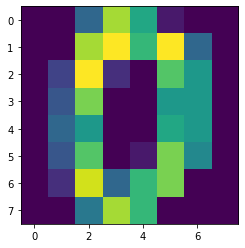

In [217]:
plt.imshow(digits.images[0])

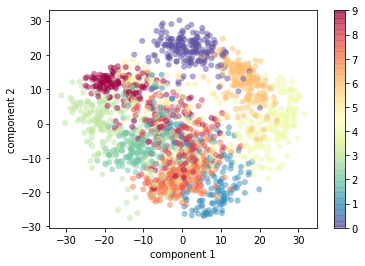

In [327]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

## Choosing the number of components

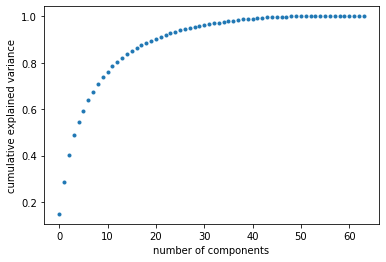

In [328]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [331]:
pca = PCA(30)
projected = pca.fit_transform(digits.data)
projected_back = pca.inverse_transform(projected)
print(digits.data.shape) 
print(projected.shape)
print(projected_back.shape)

(1797, 64)
(1797, 30)
(1797, 64)


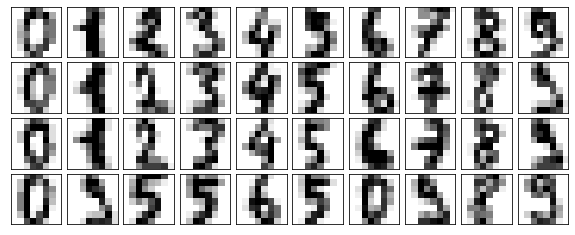

In [231]:
plot_digits(digits.data)

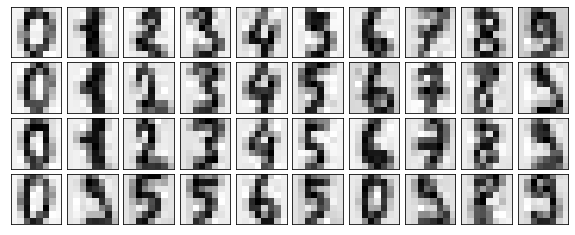

In [332]:
plot_digits(projected_back)

## PCA as Noise Filtering

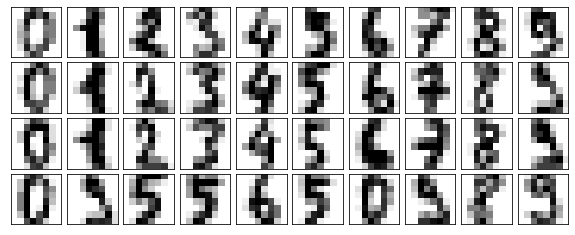

In [22]:
plot_digits(digits.data)

## 添加noise

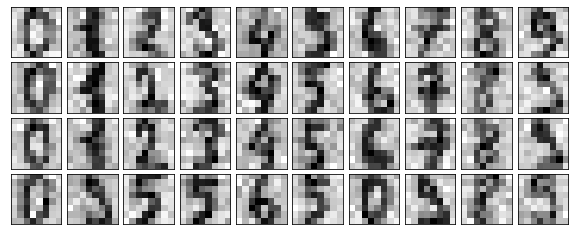

In [337]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 2)
plot_digits(noisy)

In [338]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

6

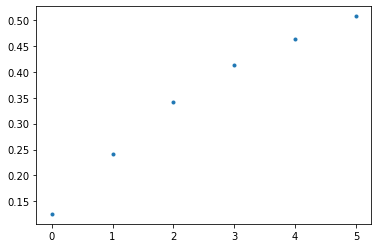

In [339]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.')

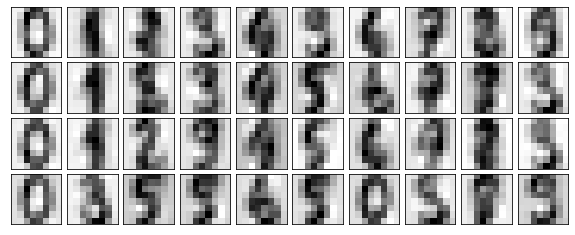

In [340]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Example: Eigenfaces

In [346]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)


['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)


In [347]:
dir(faces)

['DESCR', 'data', 'images', 'target', 'target_names']

In [28]:
faces.target_names

array(['Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Junichiro Koizumi'], dtype='<U17')

In [29]:
faces.target

array([1, 1, 0, 2, 1, 1, 3, 0, 1, 2, 1, 3, 1, 0, 3, 1, 0, 1, 1, 1, 3, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       2, 0, 1, 0, 0, 3, 1, 1, 1, 3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 3, 1, 1, 1, 0, 1,
       0, 0, 1, 3, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 0, 2, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 3, 3, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
faces.data.shape

(820, 2914)

In [348]:
from sklearn.decomposition import PCA 
pca = PCA(150,svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

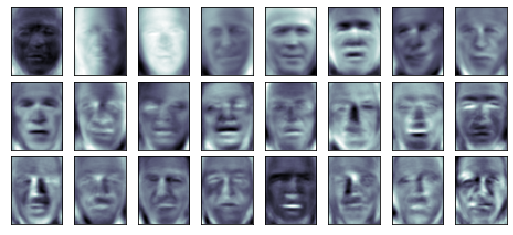

In [349]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

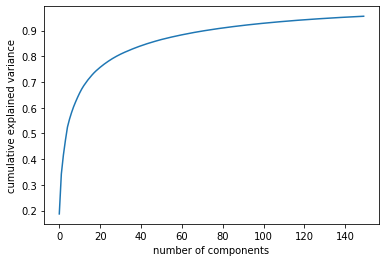

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [34]:
components = pca.transform(faces.data) 
projected = pca.inverse_transform(components)

In [35]:
components.shape

(820, 150)

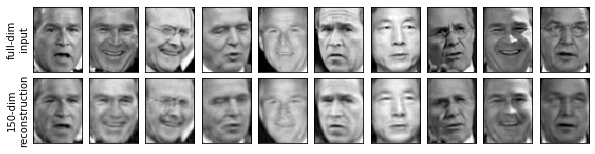

In [36]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r') 
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# Manifold Learning

In [354]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Open this PNG and draw random points from it
    from matplotlib.image import imread 
    data = imread('hello.png')[::-1, :, 0].T 
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T 
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1]) 
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [351]:
X = make_hello(1000)

In [352]:
X.shape

(1000, 2)

In [353]:
X

array([[4.65390215e-05, 4.16565828e-01],
       [5.38772018e-04, 5.11129139e-01],
       [2.61356305e-03, 8.70669034e-01],
       ...,
       [3.99099756e+00, 4.51739476e-01],
       [3.99173644e+00, 3.50711815e-01],
       [3.99557045e+00, 3.26639249e-01]])

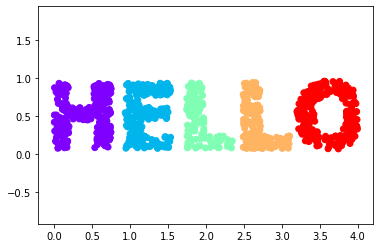

In [237]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

## MDS

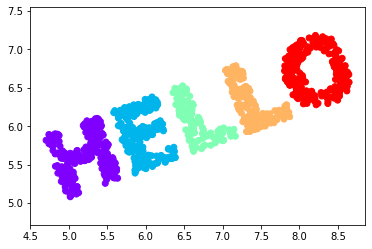

In [238]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [355]:
from sklearn.metrics import pairwise_distances 
D = pairwise_distances(X)
D.shape

(1000, 1000)

In [356]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

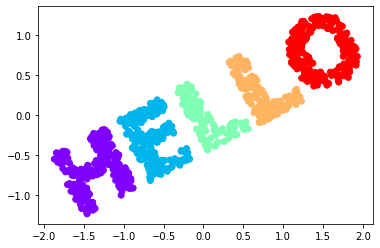

In [359]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) ## precomputed means that we are passing a distance matrix
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

## project into 3d

In [360]:
def random_projection(X, dimension=3, rseed=42): 
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) 
    e, V = np.linalg.eigh(np.dot(C, C.T)) 
    return np.dot(X, V[:X.shape[1]]) 

In [361]:
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

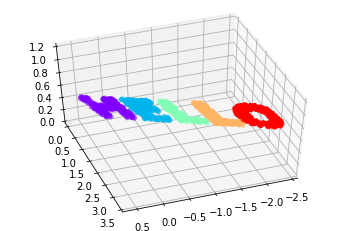

In [362]:
from mpl_toolkits import mplot3d 
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
                         **colorize)
ax.view_init(azim=70, elev=50)

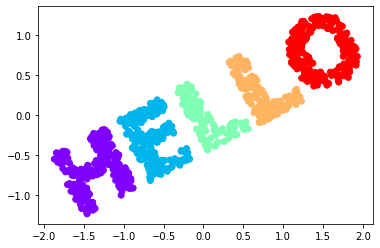

In [363]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

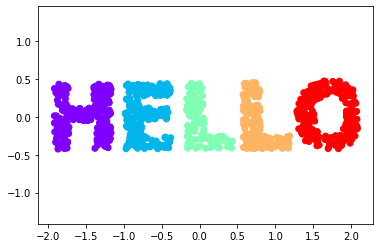

In [365]:
pca = PCA(n_components=2)
pca.fit(X3)
components = pca.transform(X3)
plt.scatter(components[:, 0], components[:, 1], **colorize)
plt.axis('equal');

## Nonlinear Embeddings: Where MDS Fails

In [366]:
def make_hello_s_curve(X): 
    t=(X[:,0]-2)*0.75*np.pi
    x = np.sin(t)
    y=X[:,1]
    z = np.sign(t) * (np.cos(t) - 1) 
    return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)

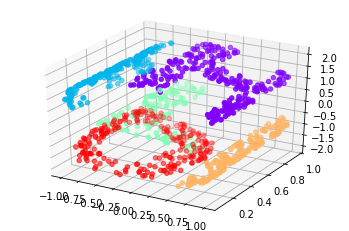

In [367]:
from mpl_toolkits import mplot3d 
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
            **colorize);

## MDS:

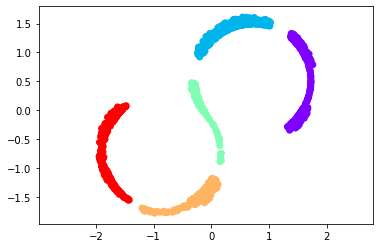

In [368]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2) 
outS = model.fit_transform(XS) 
plt.scatter(outS[:, 0], outS[:, 1], **colorize) 
plt.axis('equal');

## LLE

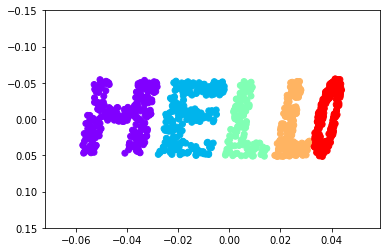

In [369]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                                   eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

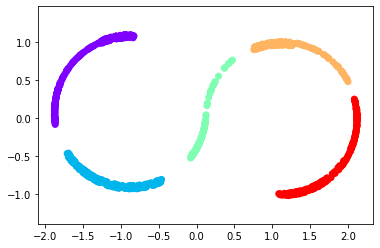

In [259]:
pca = PCA(n_components=2)
pca.fit(XS)
components = pca.transform(XS)
plt.scatter(components[:, 0], components[:, 1], **colorize)
plt.axis('equal');

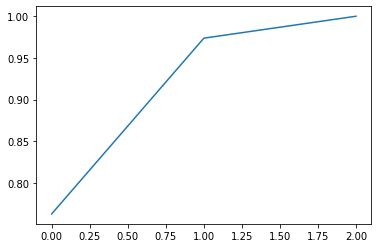

In [254]:
pca = PCA()
pca.fit(XS)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [371]:
from sklearn.manifold import Isomap 
model = Isomap(n_components=2)
proj = model.fit_transform(XS)
proj.shape

(1000, 2)

In [267]:
proj

array([[9.87939760e-04, 9.94756091e-01],
       [1.00209058e-03, 9.85501514e-01],
       [2.36810517e-04, 1.09903843e+00],
       ...,
       [9.85898844e-01, 5.11165158e-03],
       [1.03906513e+00, 4.75646500e-03],
       [1.06315586e+00, 4.57727746e-03]])

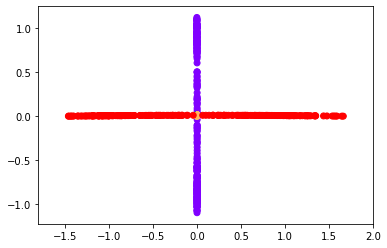

In [372]:
plt.scatter(proj[:, 0], proj[:, 1], **colorize)
plt.axis('equal');

In [373]:
from sklearn.manifold import TSNE 
model = TSNE(n_components=2)
proj = model.fit_transform(XS)
proj.shape

(1000, 2)

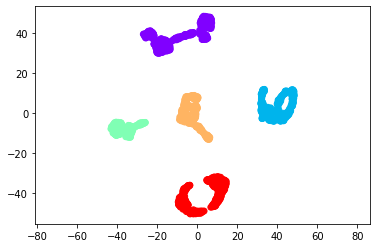

In [374]:
plt.scatter(proj[:, 0], proj[:, 1], **colorize)
plt.axis('equal');

## Example: Isomap on Faces

In [375]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=30) 
faces.data.shape


(976, 2914)

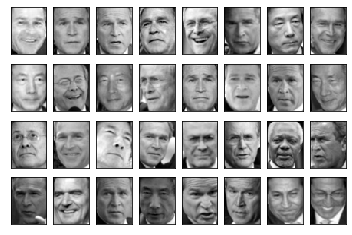

In [376]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[])) 
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

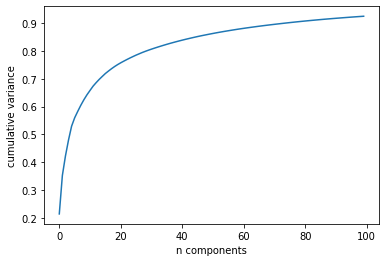

In [377]:
from sklearn.decomposition import PCA 
model = PCA(100,svd_solver='randomized').fit(faces.data) 
plt.plot(np.cumsum(model.explained_variance_ratio_)) 
plt.xlabel('n components')
plt.ylabel('cumulative variance');


In [378]:
from sklearn.manifold import Isomap 
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(976, 2)

In [379]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2 
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1) 
            if np.min(dist) < min_dist_2:
                            # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap=cmap),
                                                  proj[i])
            ax.add_artist(imagebox)

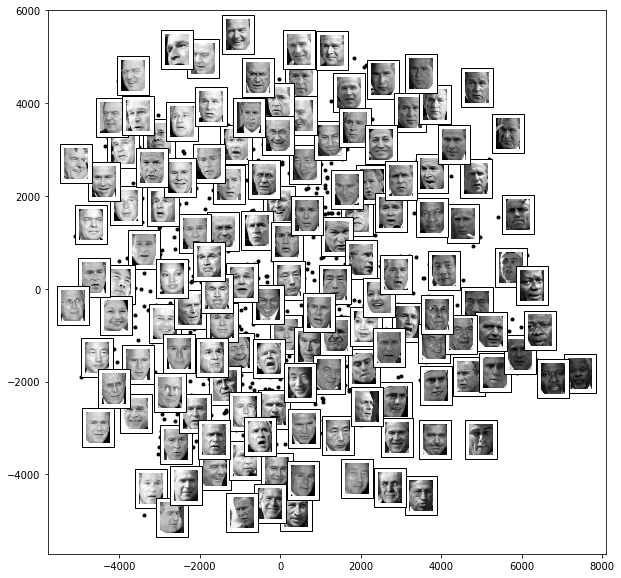

In [380]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

## Example: Visualizing Structure in Digits

In [66]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784') 
mnist.data.shape

(70000, 784)

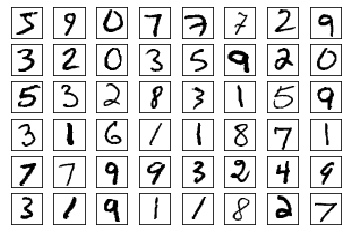

In [67]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[])) 
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

In [275]:
# use only 1/30 of the data: full dataset takes a long time! 
data = mnist.data[::30]
target = mnist.target[::30]
model = Isomap(n_components=2)
proj = model.fit_transform(data)

In [276]:
targets = np.array([int(ta) for ta in target])

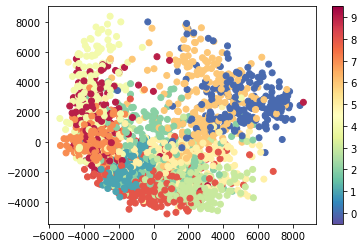

In [277]:
plt.scatter(proj[:, 0], proj[:, 1], c=targets,cmap=plt.cm.get_cmap('Spectral_r'))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [278]:
data = mnist.data[::30]
target = mnist.target[::30]
model = TSNE(n_components=2)
proj = model.fit_transform(data)

In [279]:
targets = np.array([int(ta) for ta in target])

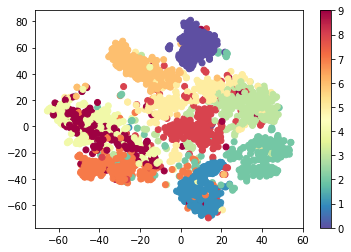

In [281]:
plt.scatter(proj[:, 0], proj[:, 1], c=targets,cmap=plt.cm.get_cmap('Spectral_r'))
plt.colorbar(ticks=range(10))

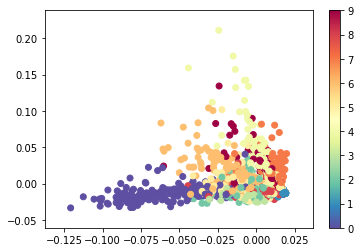

In [282]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                                   eigen_solver='dense')
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=targets,cmap=plt.cm.get_cmap('Spectral_r'))
plt.colorbar(ticks=range(10))

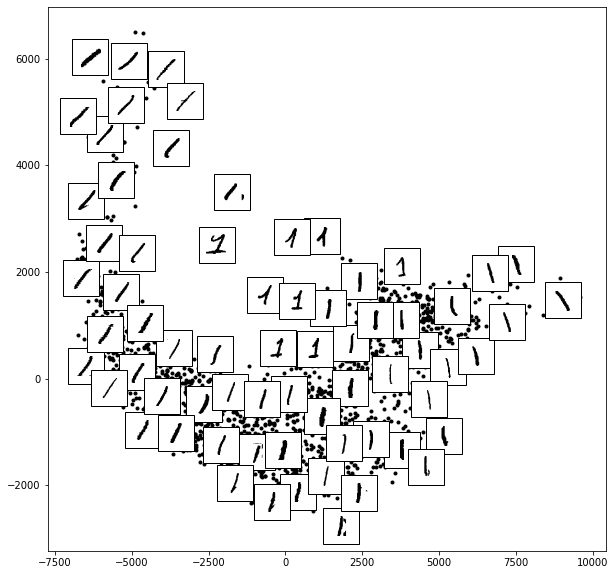

In [89]:
from sklearn.manifold import Isomap
# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == '1'][::4]
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')